# Introduction to line 144
144 is a telephone number implemented throughout the Argentine Republic to report domestic violence. The datasets studied in this notebook contain the records of the calls to this service.

Título de la columna|Tipo de dato|Descripción fecha
---|---|---
prov_residencia_persona_en_situacion_violencia |Texto (string)|Provincia en donde la persona en situación de violencia declara estar residiendo al momento de la consulta 
genero_persona_en_situacion_de_violencia |Texto (string)|Identidad de género autopercibida de la persona en situación de violencia 
edad_persona_en_situacion_de_violencia |Texto (string)|Edad declarada de la persona en situación de violencia al momento en que se ingresó la consulta 
pais_nacimiento_persona_en_situacion_de_violencia |Texto (string)|País de nacimiento de la persona en situación de violencia 
tipo_de_violencia_fisica |Texto (string)|Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta 
tipo_de_violencia_psicologica |Texto (string)|Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta 
tipo_de_violencia_sexual |Texto (string)|Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta 
tipo_de_violencia_economica_y_patrimonial |Texto (string)|Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta 
tipo_de_violencia_simbolica |Texto (string)|Tipo de violencia, contemplado por la ley 26.485, que motiva la consulta 
tipo_de_violencia_domestica |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_de_violencia_institucional |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_de_violencia_laboral |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_violencia_contra_libertad_reproductiva |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_de_violencia_obstetrica |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_de_violencia_mediatica |Texto (string)|Modalidad de violencia, contempladas por la ley 26.485, que motivan la consulta bajo la cual se desarrollaron 
modalidad_de_violencia_otras |Texto (string)|Categoría “Otras modalidades” para dejar registro de la presencia de otras modalidades distintas a las mencionadas (por ejemplo, violencia política, acoso callejero) 
vinculo_con_la_persona_agresora |Texto (string)|Vínculo que tiene o tenía la persona en situación de violencia con quien ejerce la agresión en el momento en que sucedieron las situaciones de violencia declaradas 
genero_de_la_persona_agresora |Texto (string)|Identidad de género de la persona agresora 


(*) [source](https://www.datos.gob.ar/dataset/generos-base-datos-linea-144/archivo/generos_1.4)

### Imports

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import sys

sys.version

'3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]'

## Configs

In [217]:
# Dictionary with labels to charts
labels_dict = {
    'fecha': 'Date', 
    'genero_persona_en_situacion_de_violencia': 'Gender of person in situation of violence',
    'edad_persona_en_situacion_de_violencia': 'Age of person in situation of violence',
    'tipo_de_violencia_fisica_pct': 'Violencia física',
    'tipo_de_violencia_psicologica_pct': 'Violencia psicológica', 
    'tipo_de_violencia_sexual_pct': 'Violencia sexual',
    'tipo_de_violencia_economica_y_patrimonial_pct': 'Violencia económica y patrimonial',
    'tipo_de_violencia_simbolica_pct': 'Violencia simbólica', 
    'tipo_de_violencia_domestica_pct': 'Violencia doméstica',
    'modalidad_de_violencia_institucional_pct': 'Violencia institucional',
    'modalidad_de_violencia_laboral_pct': 'Violencia laboral',
    'modalidad_violencia_contra_libertad_reproductiva_pct': 'Violencia contra la libertad reproductiva',
    'modalidad_de_violencia_obstetrica_pct': 'Violencia obstétrica',
    'modalidad_de_violencia_mediatica_pct': 'Violencia mediática',
    'modalidad_de_violencia_otras_pct': 'Otras violencias'
}

## Load data source
We have 4 datasets with data of 2020, 2021, 2022, 2023 (partial)

In [145]:
years = [2020, 2021, 2022, 2023]
data_dict = {}

for year in years:
    data_dict[year] = pd.read_csv(f'./data/linea144-{year}.csv', parse_dates=['fecha'])

data = pd.concat(data_dict, ignore_index=True)

# Excluding last column with no data
data = data.iloc[:,:-1]

assert data.shape == (84861, 19)
assert data.fecha.dtype == 'datetime64[ns]', "'fecha' must be a datetime64 type"

### Filling in missing categorical variables by using the mode
* [Heres how to fill in missing values in a dataset](https://thecleverprogrammer.com/2023/03/14/heres-how-to-fill-in-missing-values-in-a-dataset/) 

#### Summary from the article

> So the first step is to see if your data has missing values. If your data has missing values, you need to check the distribution of each numerical variable (with missing values). If the values in the numerical variables are missing, use the Mean value if the variable is in a normal distribution. Otherwise, choose Median. And if the variable is categorical or discrete, you can select mode. So you need to choose a different measure for each variable. I hope you liked this article on how to fill in missing values in your data. Feel free to ask valuable questions in the comments section below.

In [146]:
# Filling nan rows with mode
def fill_with_mode_the_nan_values(field):

    # n records NaN to theis field 
    fields_nan = data[field].isna().sum()
    print(f'Processing records NaN to {field}: {fields_nan}')
    
    if fields_nan > 0:
        # filling using the mode, like shown in link above
        field_mode = data[field].mode()[0]

        data[field].fillna(field_mode, inplace=True)

fields = ['prov_residencia_persona_en_situacion_violencia', 'genero_persona_en_situacion_de_violencia', \
          'pais_nacimiento_persona_en_situacion_de_violencia', 'vinculo_con_la_persona_agresora', \
            'genero_de_la_persona_agresora']

[fill_with_mode_the_nan_values(field) for field in fields]

Processing records NaN to prov_residencia_persona_en_situacion_violencia: 1229
Processing records NaN to genero_persona_en_situacion_de_violencia: 1776
Processing records NaN to pais_nacimiento_persona_en_situacion_de_violencia: 28706
Processing records NaN to vinculo_con_la_persona_agresora: 3192
Processing records NaN to genero_de_la_persona_agresora: 8737


[None, None, None, None, None]

### Filling numeric values (edad_persona_en_situacion_de_violencia) using the median
* **Mean**, when we have a normal distribution
* **Median**, otherwise

Kurtosis: 1.315091416195283
There are/was 16402 missing values to field "edad_persona_en_situacion_de_violencia"


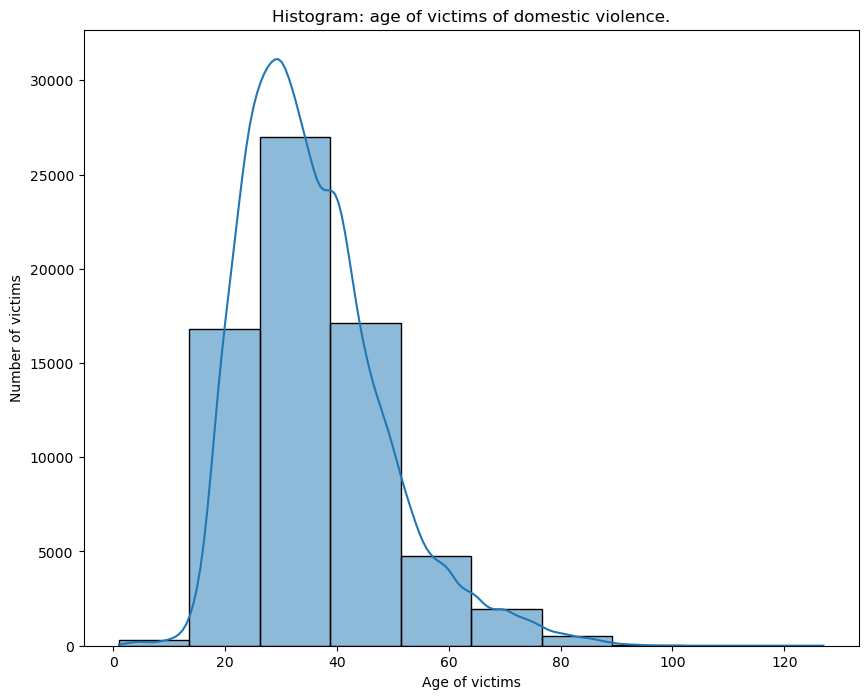

In [147]:
# Histogram: distribution ins't normal

# Calculate kurtosis
print(f'Kurtosis: {data.edad_persona_en_situacion_de_violencia.kurtosis()}')

# Count of missing values
print(f'There are/was {data.edad_persona_en_situacion_de_violencia.isna().sum()} missing values to field "edad_persona_en_situacion_de_violencia"')

plt.figure(figsize=(10, 8))
f = sns.histplot(data['edad_persona_en_situacion_de_violencia'], bins=10, kde=True)
f.set_title('Histogram: age of victims of domestic violence.')
f.set_xlabel("Age of victims")
f.set_ylabel("Number of victims")
plt.show()

# Calculate the median
age_median = data.edad_persona_en_situacion_de_violencia.median()

# Filling data with the mean
data.fillna(age_median, inplace=True)


### Types and modalities whose values are boolean

In [148]:


# 1. Define wich fields will be processed 
boolean_fields = ['tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica', 'tipo_de_violencia_sexual', \
                    'tipo_de_violencia_economica_y_patrimonial', 'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
                    'modalidad_de_violencia_institucional', 'modalidad_de_violencia_laboral', \
                    'modalidad_violencia_contra_libertad_reproductiva', 'modalidad_de_violencia_obstetrica', \
                    'modalidad_de_violencia_mediatica', 'modalidad_de_violencia_otras']

# 2. View and confirmation that they are boolean
def fields_view_validation(field):
    print(f"Types for field '{field}': {data[field].unique()}")

# 3. Show
[fields_view_validation(field) for field in boolean_fields]

# 4. Cast to boolean 
mapping = {'Si': True, 'SI': True, 'No': False, 'NO': False}

for field in boolean_fields:
    data[field] = data[field].map(mapping)


Types for field 'tipo_de_violencia_fisica': ['Si' 'No']
Types for field 'tipo_de_violencia_psicologica': ['Si' 'No']
Types for field 'tipo_de_violencia_sexual': ['No' 'Si' 'SI']
Types for field 'tipo_de_violencia_economica_y_patrimonial': ['No' 'Si']
Types for field 'tipo_de_violencia_simbolica': ['No' 'Si' 'SI']
Types for field 'tipo_de_violencia_domestica': ['Si' 'No']
Types for field 'modalidad_de_violencia_institucional': ['No' 'Si' 'SI']
Types for field 'modalidad_de_violencia_laboral': ['No' 'Si' 'SI']
Types for field 'modalidad_violencia_contra_libertad_reproductiva': ['No' 'Si' 'SI']
Types for field 'modalidad_de_violencia_obstetrica': ['No' 'Si' 'SI']
Types for field 'modalidad_de_violencia_mediatica': ['No' 'Si']
Types for field 'modalidad_de_violencia_otras': ['No' 'Si']



### Boolean fields: Mapping fields to a readable title

In [149]:


boolean_fields_titles = ['Type of Physical Violence',
'Type of Psychological Violence',
'Type of Sexual Violence',
'Type of Economic And Patrimonial Violence',
'Type of Symbolic Violence',
'Type of Domestic Violence',
'Modality of Institutional Violence',
'Type of Workplace Violence',
'Modality Violence Against Reproductive Freedom',
'Modality of Obstetric Violence',
'Modality of Media Violence',
'Modality of Violence Other']

boolean_fields_dict = {}
for (id, title) in zip(boolean_fields, boolean_fields_titles):
    boolean_fields_dict[id] = title

# Validating
data[boolean_fields].sample(10)

tipo_de_violencia_fisica  tipo_de_violencia_psicologica  \
36                        False                           True   
17119                      True                           True   
71173                      True                           True   
41521                      True                           True   
66238                      True                           True   
46976                      True                           True   
65457                      True                           True   
45448                      True                           True   
46451                      True                           True   
52320                      True                           True   

       tipo_de_violencia_sexual  tipo_de_violencia_economica_y_patrimonial  \
36                        False                                       True   
17119                      True                                      False   
71173                      True                                      False   
41521                     False                                      False   
66238                     False                                      False   
46976                     False                                       True   
65457                     False                                      False   
45448                     False                                      False   
46451                     False                                       True   
52320                      True                                      False   

       tipo_de_violencia_simbolica  tipo_de_violencia_domestica  \
36                           False                         True   
17119                        False                         True   
71173                         True                        False   
41521                        False                         True   
66238                         True                         True   
46976                        False                         True   
65457                        False                         True   
45448                        False                         True   
46451                        False                         True   
52320                        False                         True   

       modalidad_de_violencia_institucional  modalidad_de_violencia_laboral  \
36                                    False                           False   
17119                                 False                           False   
71173                                 False                           False   
41521                                 False                           False   
66238                                 False                           False   
46976                                 False                           False   
65457                                 False                           False   
45448                                 False                           False   
46451                                 False                           False   
52320                                 False                           False   

       modalidad_violencia_contra_libertad_reproductiva  \
36                                                False   
17119                                             False   
71173                                             False   
41521                                             False   
66238                                             False   
46976                                             False   
65457                                             False   
45448                                             False   
46451                                             False   
52320                                             False   

       modalidad_de_violencia_obstetrica  modalidad_de_violencia_mediatica  \
36                                 False                             False   
17119  

## Exploring data

### Showing boolean features

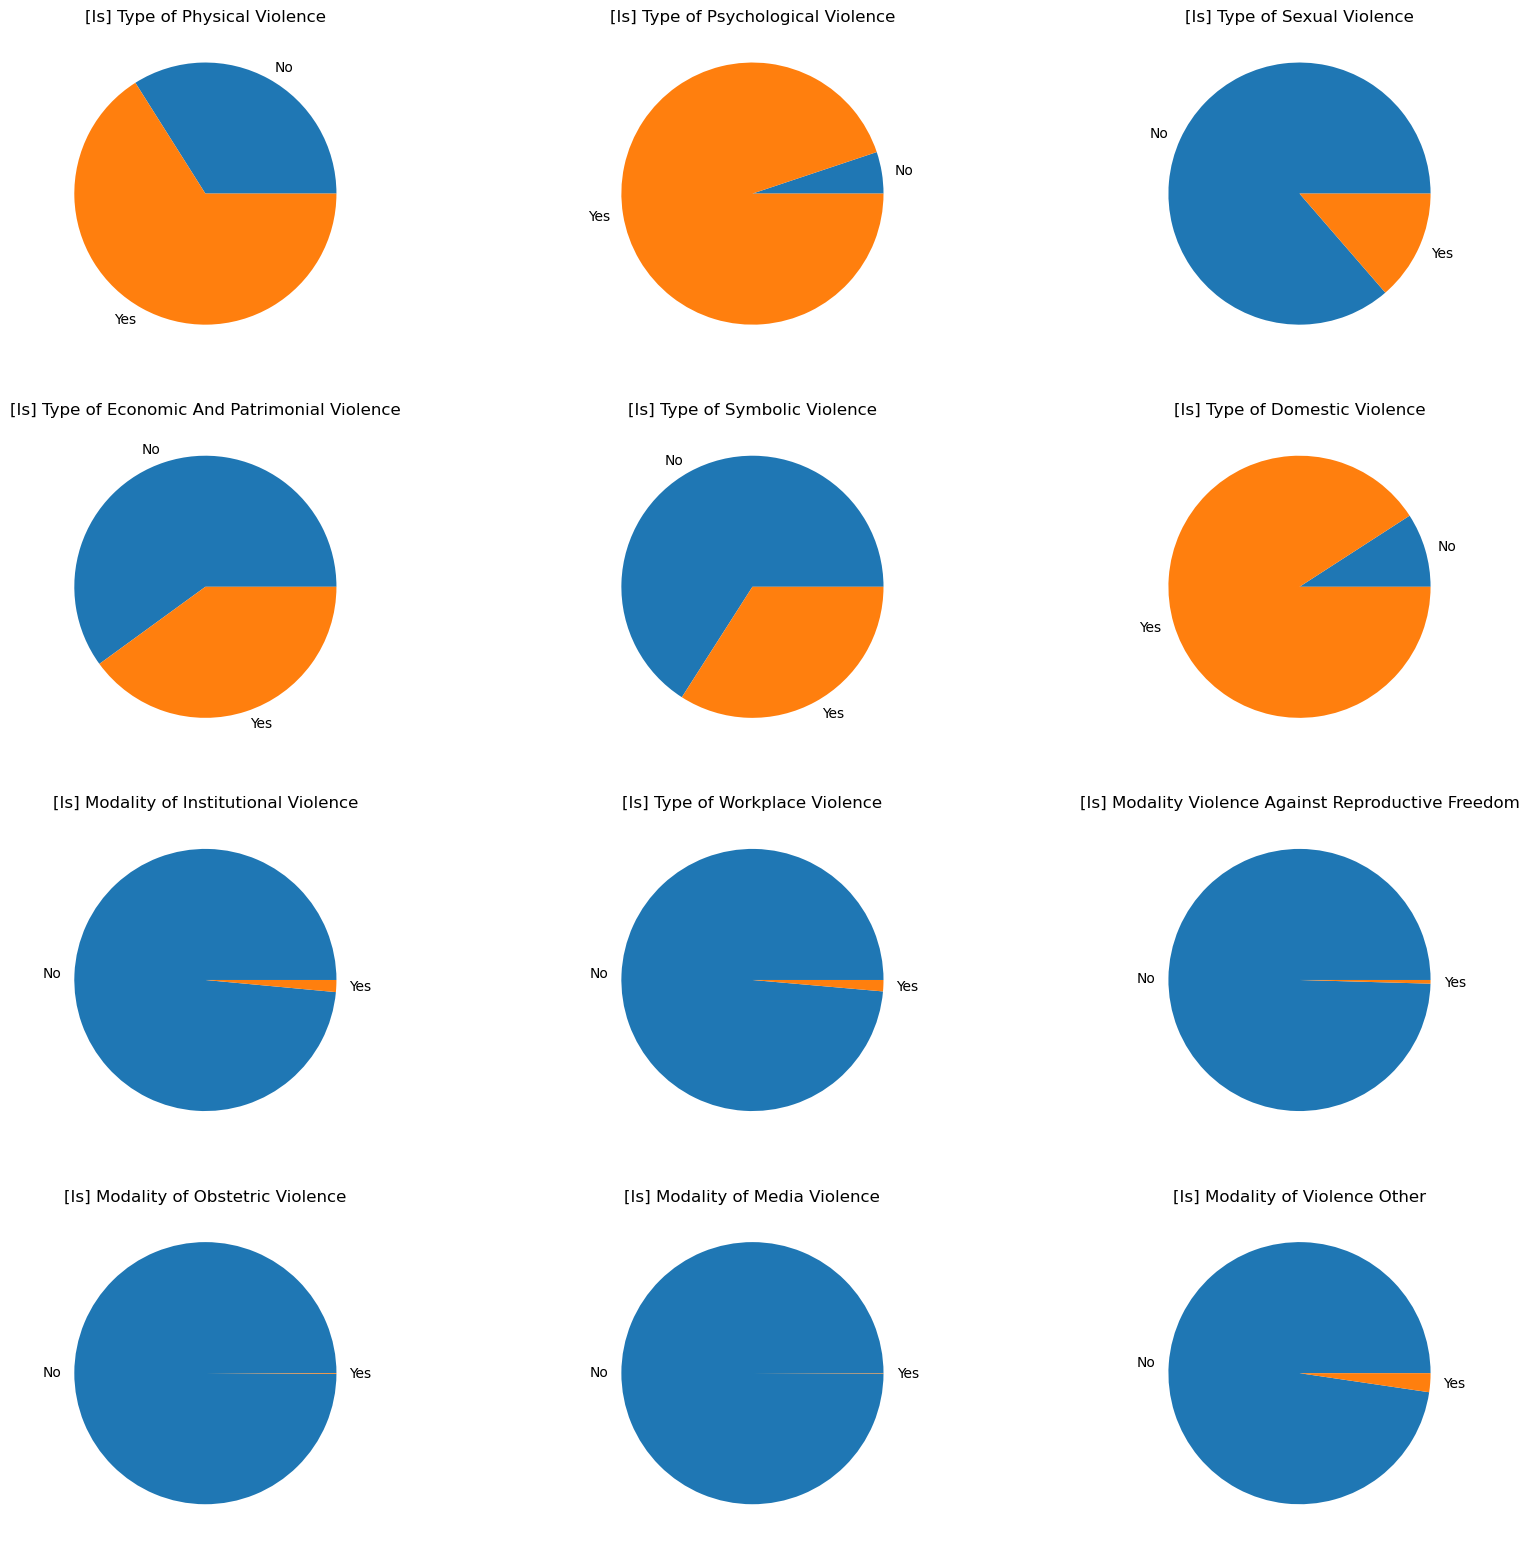

In [150]:
cols = 3
total = len(boolean_fields_dict)
rows = total // cols
rows += 1 if total % cols != 0 else rows
position = range(1, total + 1)

fig = plt.figure(1, figsize=(20,40))    
for k, id in enumerate(boolean_fields_dict):
    ax = fig.add_subplot(rows, cols, position[k])
    ax = data.groupby(id).size().plot(kind='pie', title= f'[Is] {boolean_fields_dict[id]}', labels=['No', 'Yes'])
    
plt.show()

### AGE

#### Distribution of victims

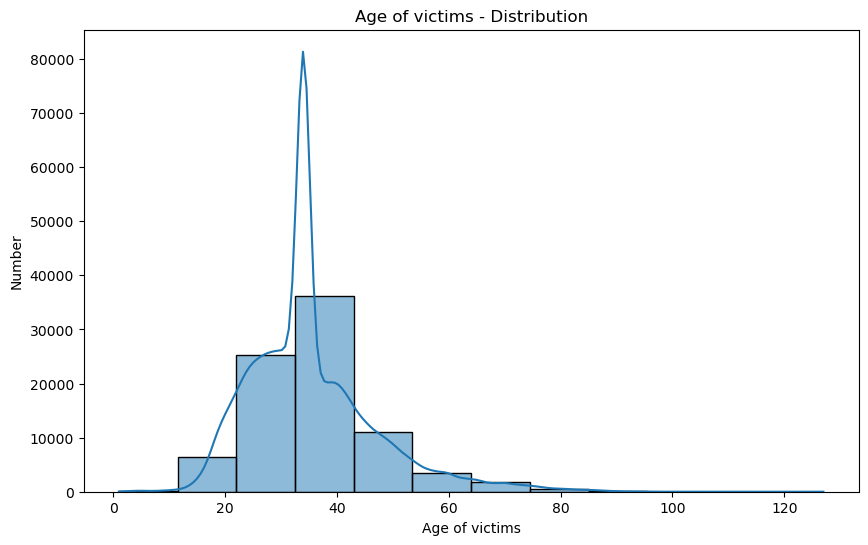

In [151]:
plt.figure(figsize=(10,6))
fig = sns.histplot(data['edad_persona_en_situacion_de_violencia'], bins=12, kde=True)
fig.set_title(('Age of victims - Distribution'))
fig.set_xlabel('Age of victims')
fig.set_ylabel('Number')
plt.show()

#### Mean and median of victims age

In [152]:
mean_age = data.edad_persona_en_situacion_de_violencia.mean()
median_age = data.edad_persona_en_situacion_de_violencia.median()

print(f'The mean age of victims is {round(mean_age, 0)} yo')
print(f'The median age of vinctims is {round(mean_age, 0)} yo')

The mean age of victims is 35.0 yo
The median age of vinctims is 35.0 yo


#### Finding outliers

In [153]:
fig = px.box(data, y='edad_persona_en_situacion_de_violencia', x='genero_persona_en_situacion_de_violencia', \
            title='Distribution and outliers of age of persons in violent situation', \
            color='genero_persona_en_situacion_de_violencia', \
            labels=labels_dict)
fig.show()

#### Age average by gender

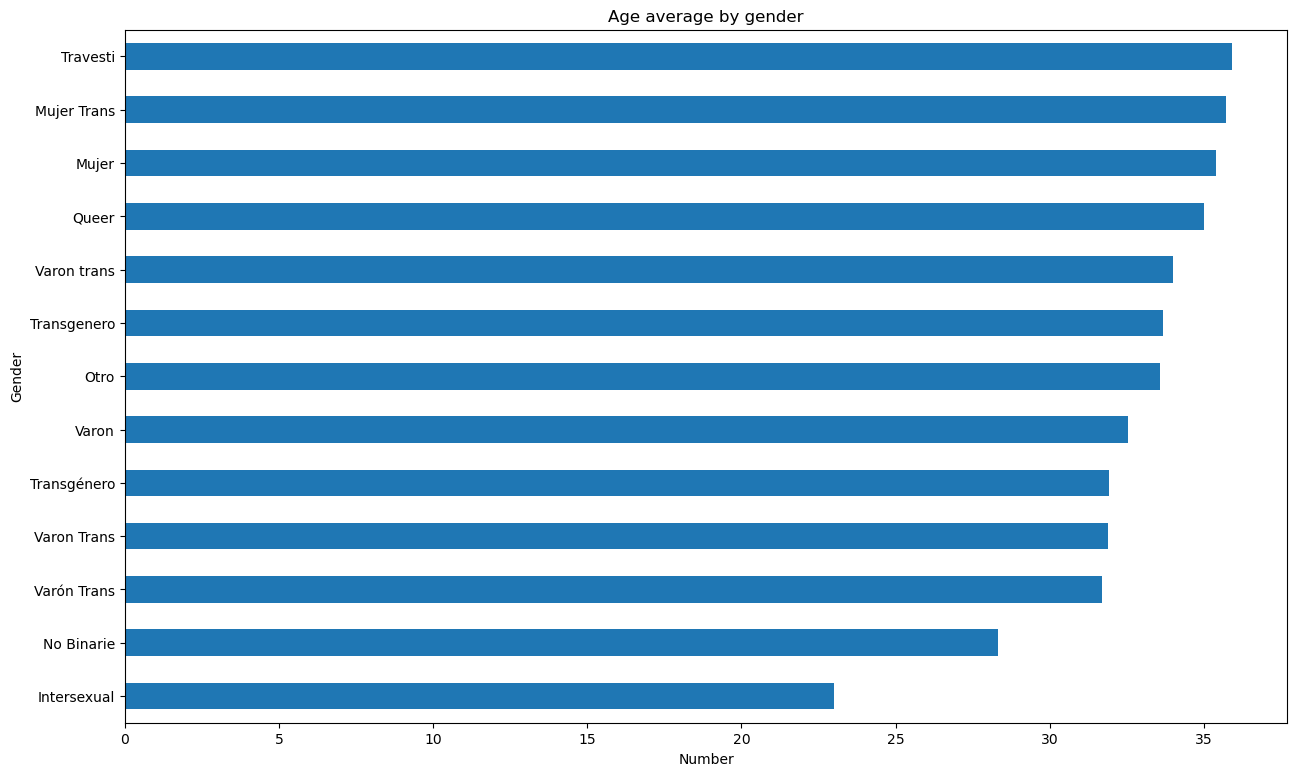

In [154]:

plt.figure(figsize=(15,9))
ax = data.groupby('genero_persona_en_situacion_de_violencia')['edad_persona_en_situacion_de_violencia'].mean() \
    .sort_values() \
    .plot(kind='barh', title='Age average by gender')
ax.set_xlabel('Number')
ax.set_ylabel('Gender')
plt.show()


### GENDER

#### Gender distribution

In the first chart, we can see that the overwhelming majority of victims of violence are women.

In the second chart, we use a logarithmic scale, in this way - although we may lose the dimension of the difference, we get an idea of the scales of the other genres present in the dataset.

In [155]:
by_gender = data.groupby('genero_persona_en_situacion_de_violencia').size().reset_index()
by_gender.columns = ['genero', 'size']

fig = px.treemap(by_gender, \
                 path=['genero'], \
                 values='size', \
                 title="Gender distribution")

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

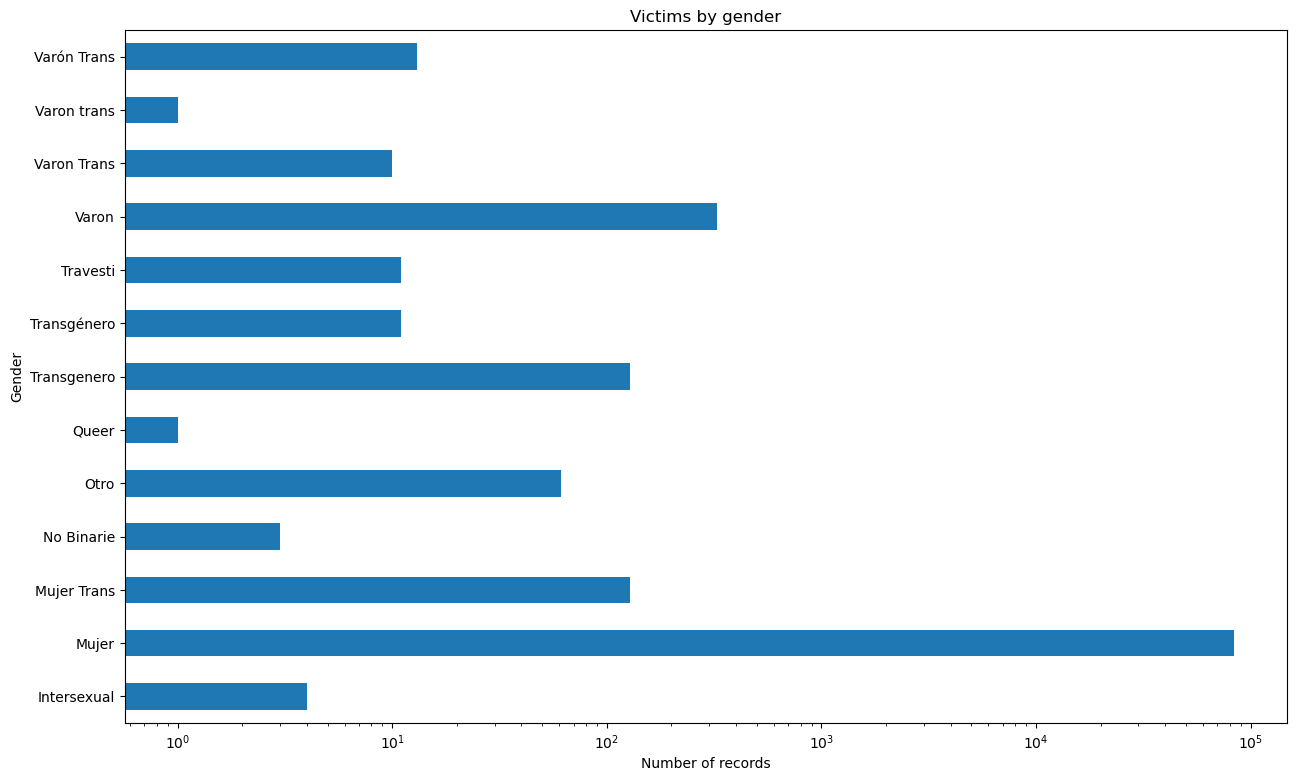

In [156]:
plt.figure(figsize=(15,9))
ax = data.groupby('genero_persona_en_situacion_de_violencia').size() \
    .plot(kind='barh', title='Victims by gender', logx=True)

ax.set_ylabel('Gender')
ax.set_xlabel('Number of records')

plt.show()

### TYPES OF VIOLENCE

* types of violence by gender
* types of violence by age interval
* types of violence by region or province

In [166]:
# data[data.tipo_de_violencia_fisica == True].index.value_counts
genders = list(data.genero_persona_en_situacion_de_violencia.unique())
types_of_violence = ['tipo_de_violencia_fisica', 'tipo_de_violencia_psicologica',
       'tipo_de_violencia_sexual', 'tipo_de_violencia_economica_y_patrimonial',
       'tipo_de_violencia_simbolica', 'tipo_de_violencia_domestica',
       'modalidad_de_violencia_institucional',
       'modalidad_de_violencia_laboral',
       'modalidad_violencia_contra_libertad_reproductiva',
       'modalidad_de_violencia_obstetrica', 'modalidad_de_violencia_mediatica',
       'modalidad_de_violencia_otras']

# genders.insert(0, 'Tipo_violencia')
result = pd.DataFrame(columns=genders)

for tipo in types_of_violence:
    row = data[data[tipo] == True].groupby('genero_persona_en_situacion_de_violencia').size()
    row_dict = {}
    # row_dict['Tipo_violencia'] = tipo
    for feature, _count in zip(row.index, row.values):
        row_dict[feature] = int(_count)
    result.loc[tipo] = row_dict

result.fillna(0, inplace=True)

In [167]:
# tratar varon trans
res['Varon Trans'] = res.apply(lambda x : x['Varon Trans'] + x['Varon trans'] + x['Varón Trans'], axis=1)
res.drop(['Varon trans', 'Varón Trans'], axis=1, inplace=True)


In [205]:
# calcular pcts
res_pcts = res.T
for col in res_pcts.columns:
    new_col = '{}_pct'.format(col)
    res_pcts[new_col] = res_pcts.apply(lambda row : (row[col] / sum(row.iloc[:12])*100), axis=1)
    res_pcts.drop(col, axis=1, inplace=True)
    # display(new_col, total)


# Resultado
# sum(res_pcts.loc['Mujer'].values), sum(res.T.loc['Mujer'].values)
res_pcts.reset_index(inplace=True, names=['genero'])

res_pcts


genero  tipo_de_violencia_fisica_pct  \
0         Mujer                     19.137463   
1         Varon                     19.176801   
2   Mujer Trans                     15.633423   
3   Transgenero                     15.957447   
4          Otro                     14.423077   
5   Intersexual                     23.076923   
6      Travesti                     19.354839   
7         Queer                     25.000000   
8   Varon Trans                     15.294118   
9    No Binarie                     20.000000   
10  Transgénero                     28.947368   

    tipo_de_violencia_psicologica_pct  tipo_de_violencia_sexual_pct  \
0                           33.968246                      7.369460   
1                           34.194739                      8.287676   
2                           32.254784                      9.023564   
3                           34.341751                     12.683354   
4                           29.102538                      7.853769   
5                           12.093023                      0.000000   
6                           22.545455                      1.757460   
7                            3.571429                      0.000000   
8                           27.493261                      2.202949   
9                           10.714286                      0.000000   
10                          19.661336                      6.191116   

    tipo_de_violencia_economica_y_patrimonial_pct  \
0                                       23.452465   
1                                       20.430999   
2                                        8.301794   
3                                       12.447284   
4                                        9.976345   
5                                        4.857913   
6                                        3.468744   
7                                        0.000000   
8                                        5.495090   
9                                        2.800000   
10                                       4.491030   

    tipo_de_violencia_simbolica_pct  tipo_de_violencia_domestica_pct  \
0                         26.013871                        93.986893   
1                         18.063803                        68.111543   
2                         24.431364                        37.440880   
3                         18.481740                        35.400668   
4                         23.322749                        29.644587   
5                          0.000000                         9.085157   
6                          5.073867                         4.901932   
7                          3.271028                         3.044839   
8                         18.582196                        18.266290   
9                          2.665651                         7.656980   
10                         2.928650                         7.223398   

    modalidad_de_violencia_institucional_pct  \
0                                  23.919478   
1                                   5.043740   
2                                   6.828659   
3                                  12.398315   
4                                   6.186058   
5                                   0.000000   
6                                   6.338914   
7                                   0.000000   
8                                   3.180193   
9                                   0.000000   
10                                  2.799438   

    modalidad_de_violencia_laboral_pct  \
0                            30.014266   
1                             6.207668   
2                             4.461029   
3                             6.505734   
4                             2.352773   
5                             0.000000   
6                             0.000000   
7                             0.000000   
8                             2.116086   
9                             0.000000   
10                        

In [222]:
# por genero
data = []
generos = res_pcts.genero.values
for tipo in res_pcts.columns[1:]:
    data.append(go.Bar(name=labels_dict[tipo], x=generos, y=res_pcts[tipo].values))

fig = go.Figure(data=data)
fig.update_layout(barmode='group')
fig.show()

In [240]:


# por violencia
data = []
labels = [labels_dict[x] for x in res_pcts.columns[1:]]
for genero in res_pcts.genero.values:
    d = res_pcts[res_pcts['genero'] == genero].values[0][1:]
    data.append(go.Bar(name=genero, x=labels, y=d))

fig = go.Figure(data=data)
fig.update_layout(barmode='group', \
                  title='Type of violence by gender (PCT)')
fig.show()



### TIME SERIES

#### Adding column with month of call

In [158]:
data['month'] = data.fecha.map(lambda x : x.month)
data['year'] = data.fecha.map(lambda x : x.year)
data['monthly'] = data.fecha.map(lambda x : "{}-{}".format(x.year, str(x.month).zfill(2)))

data[['fecha', 'month', 'year', 'monthly']].sample(5).sort_values(by='fecha')

fecha  month  year  monthly
20431 2020-08-29      8  2020  2020-08
23145 2020-10-05     10  2020  2020-10
32132 2021-02-06      2  2021  2021-02
50414 2021-10-29     10  2021  2021-10
54213 2021-12-19     12  2021  2021-12

#### Calls by month

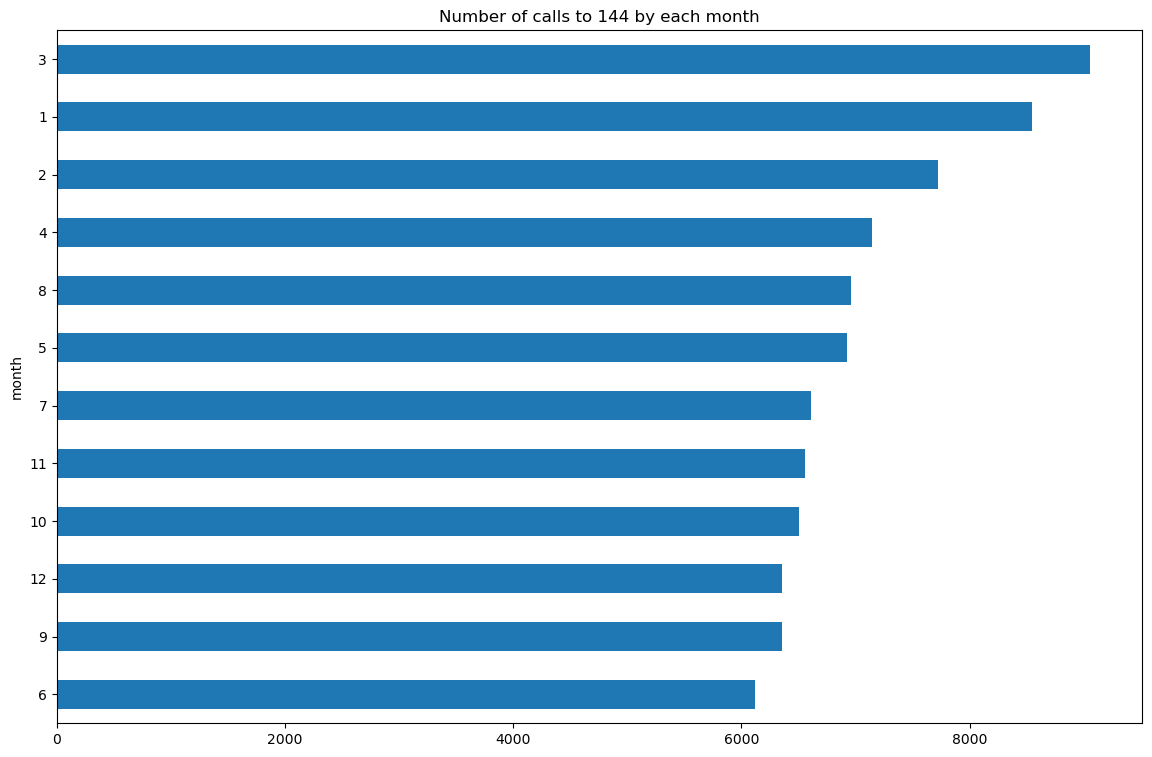

In [159]:

plt.figure(figsize=(14,9))
ax1 = data.groupby('month').size().sort_values() \
    .plot(kind='barh', title='Number of calls to 144 by each month')
plt.show()

#### Evolution (month, year) by age

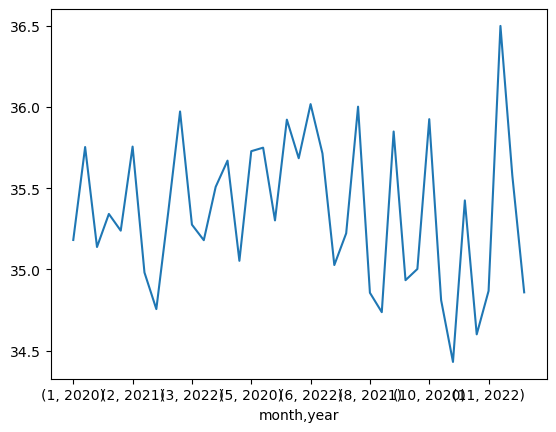

In [160]:
data.groupby(['month', 'year'])['edad_persona_en_situacion_de_violencia'].agg('mean').plot(kind='line')
plt.show()

#### Evolution along time (all types of violence)

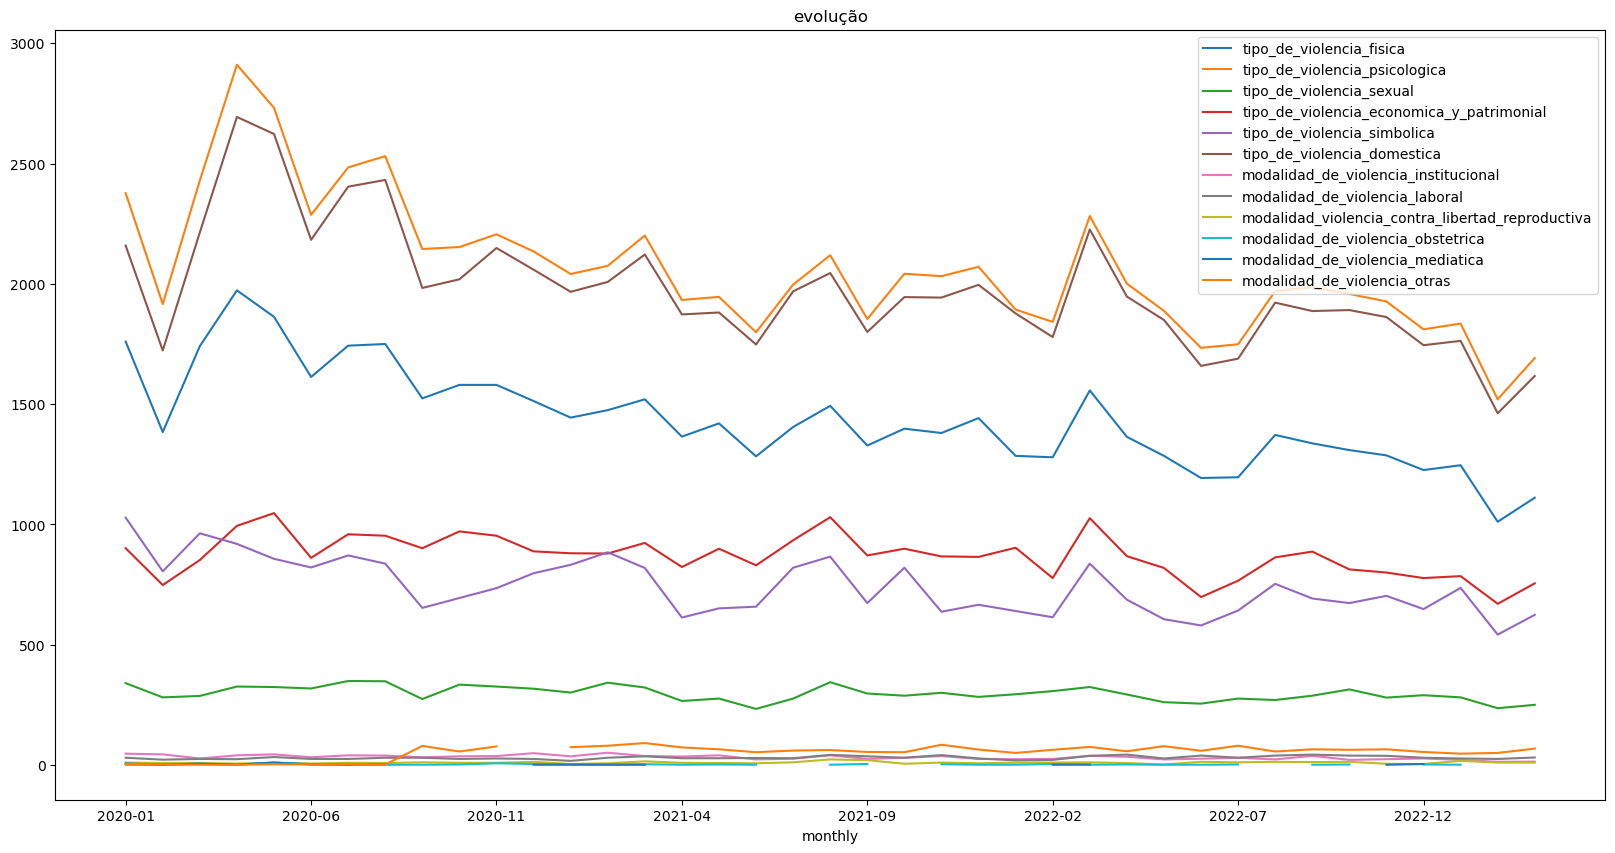

In [161]:
df = pd.DataFrame()

for field in boolean_fields: 
    df[field] = data[data[field]][['monthly', field]].groupby('monthly').size()

df.plot(kind='line', title='evolução', figsize=(20,10))
plt.show()

#### Evolution along time (multiple types of violence)

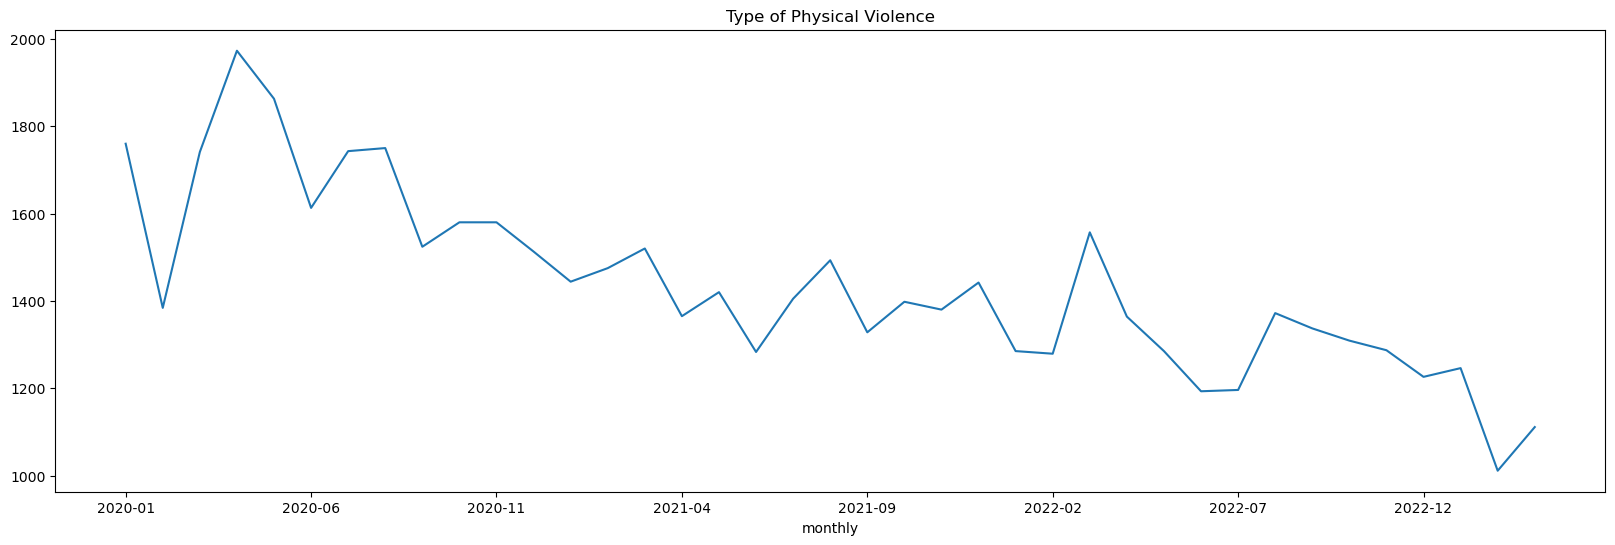

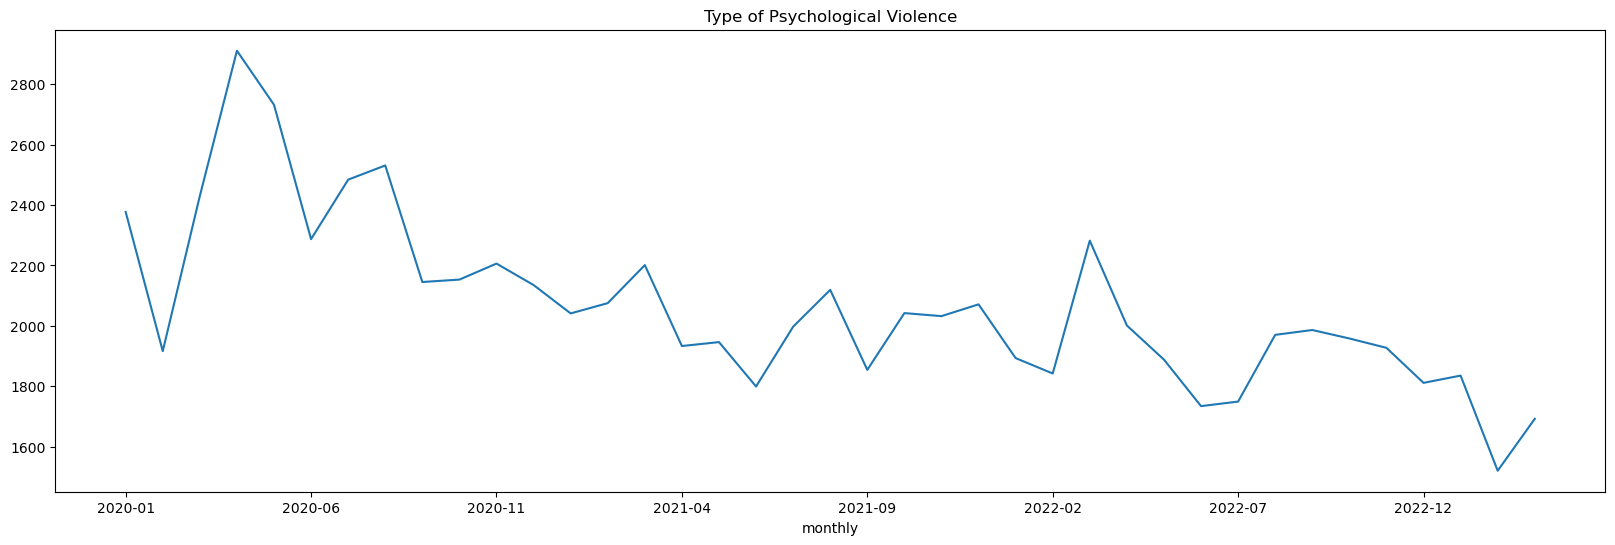

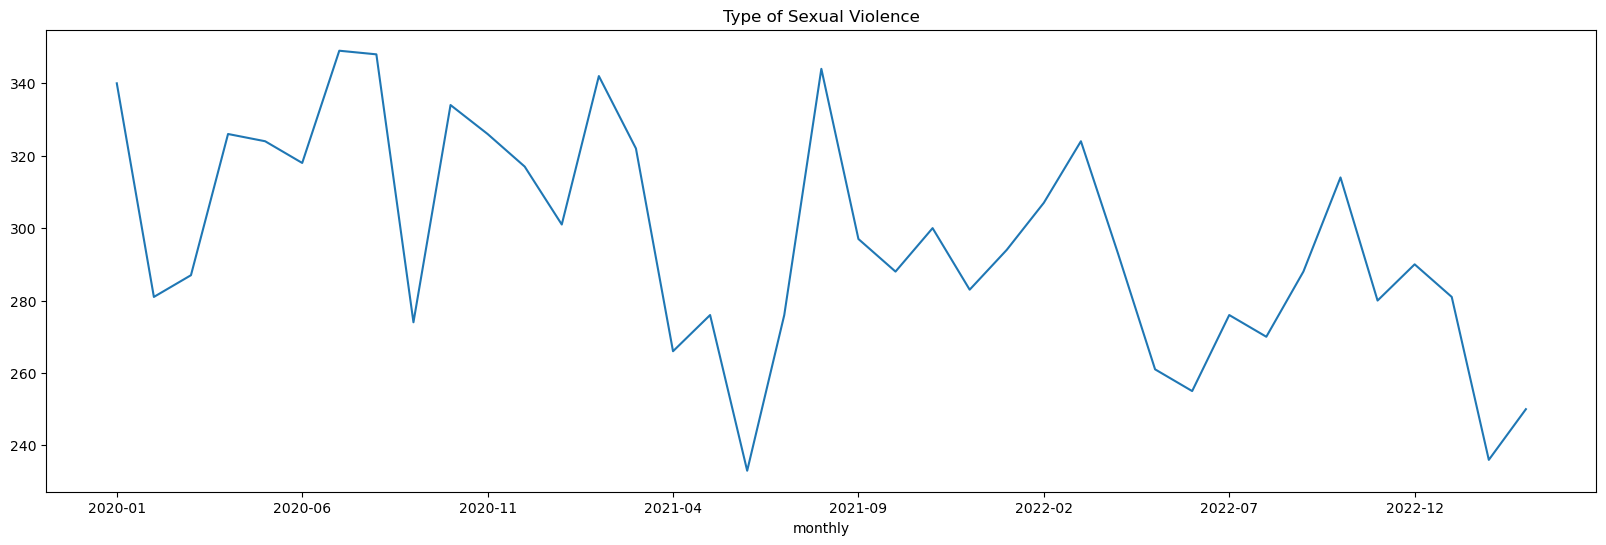

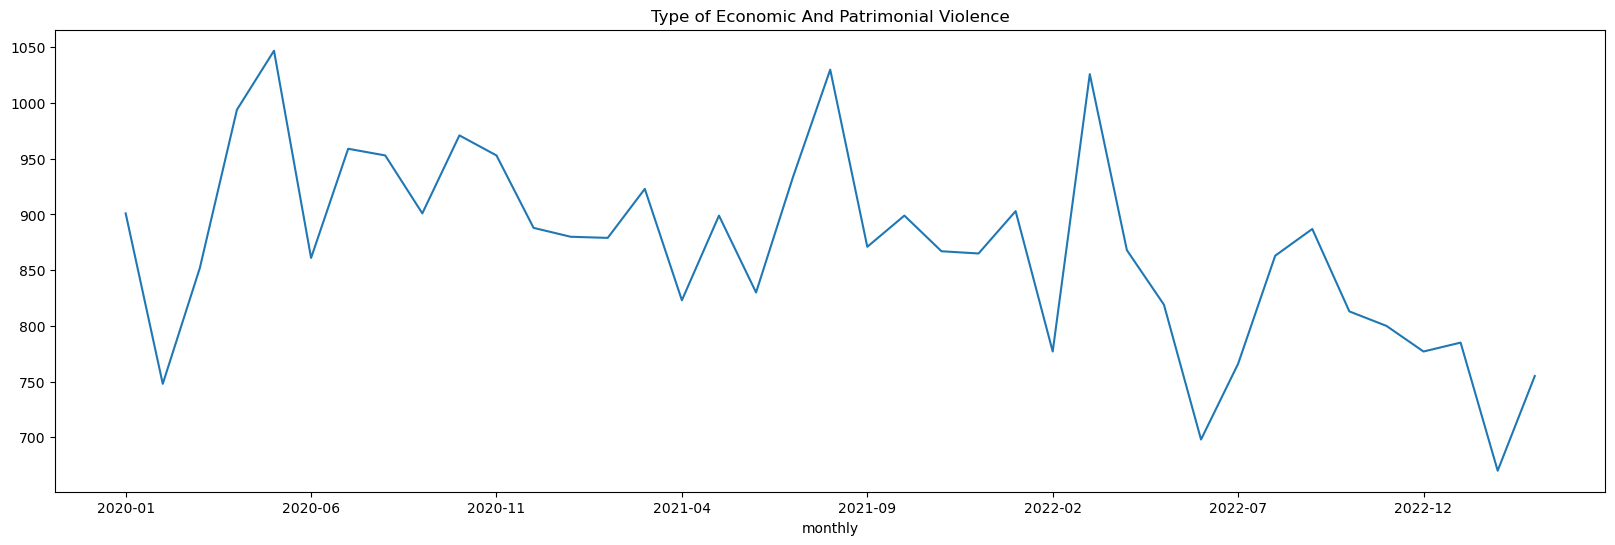

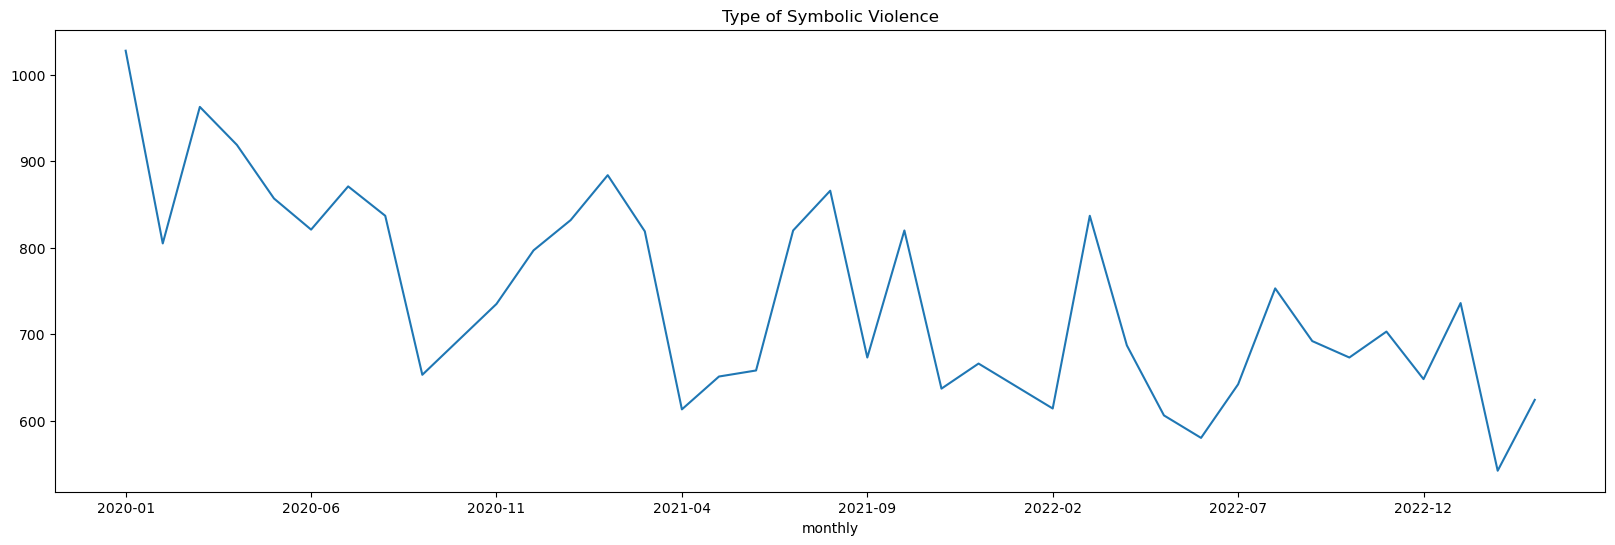

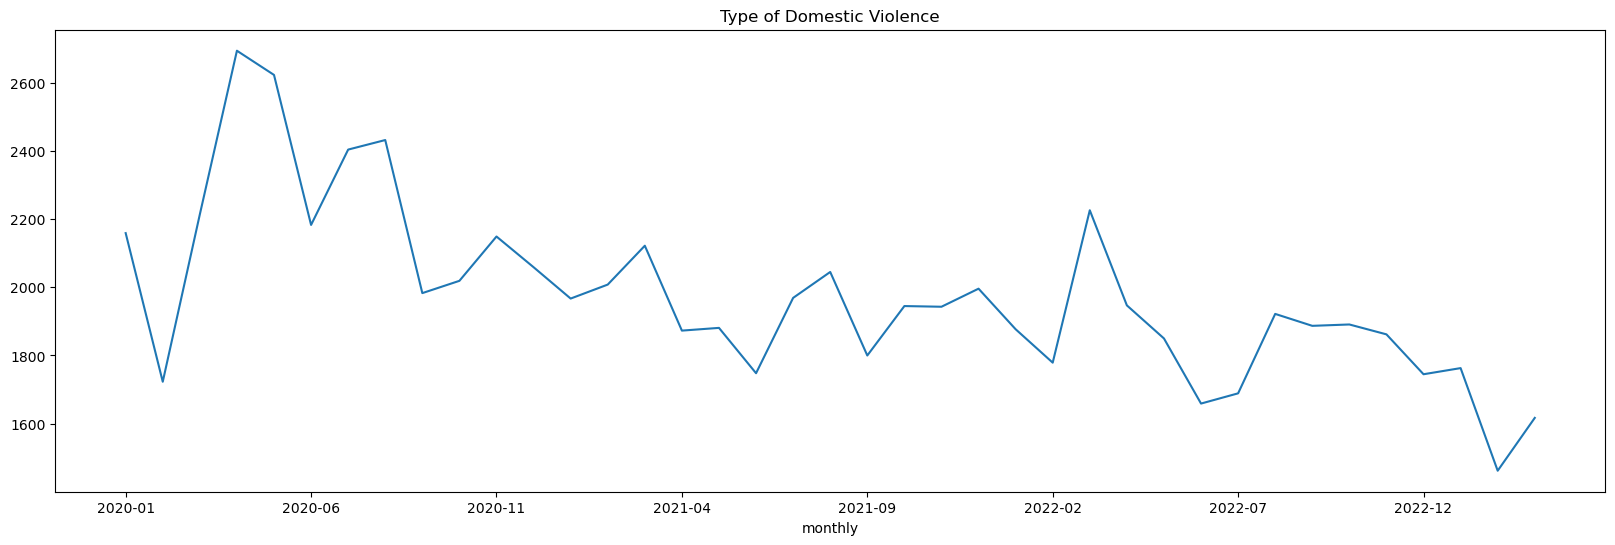

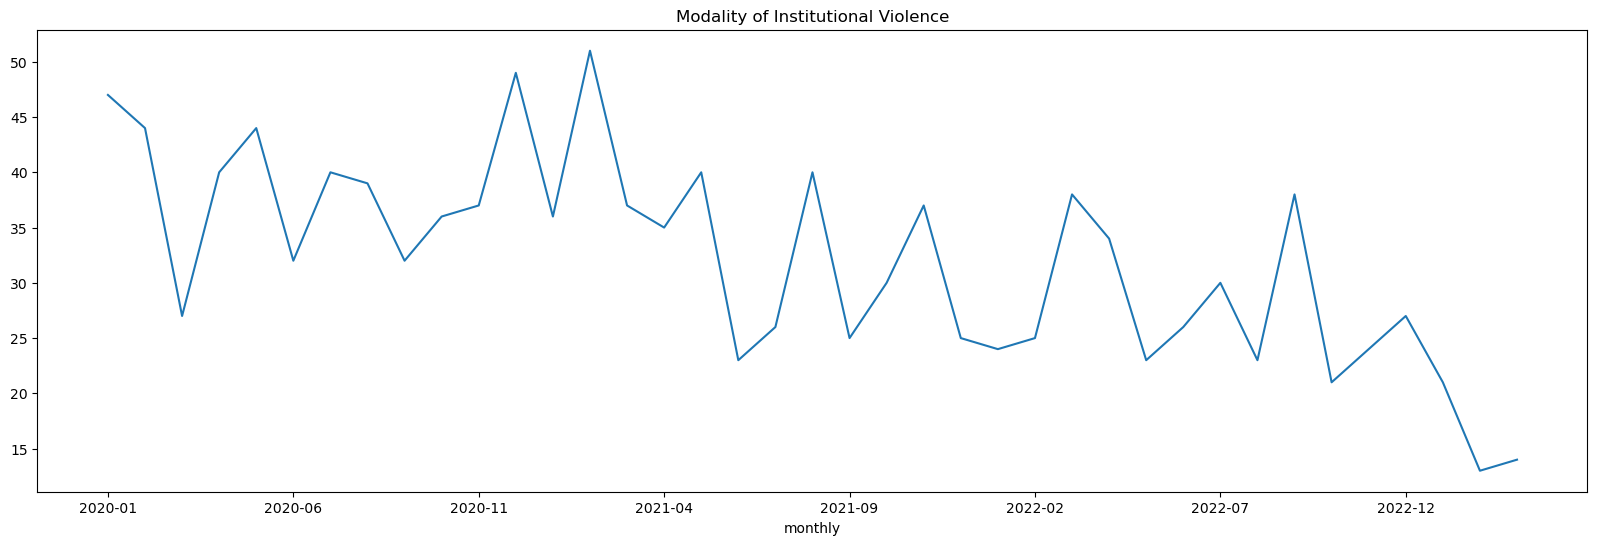

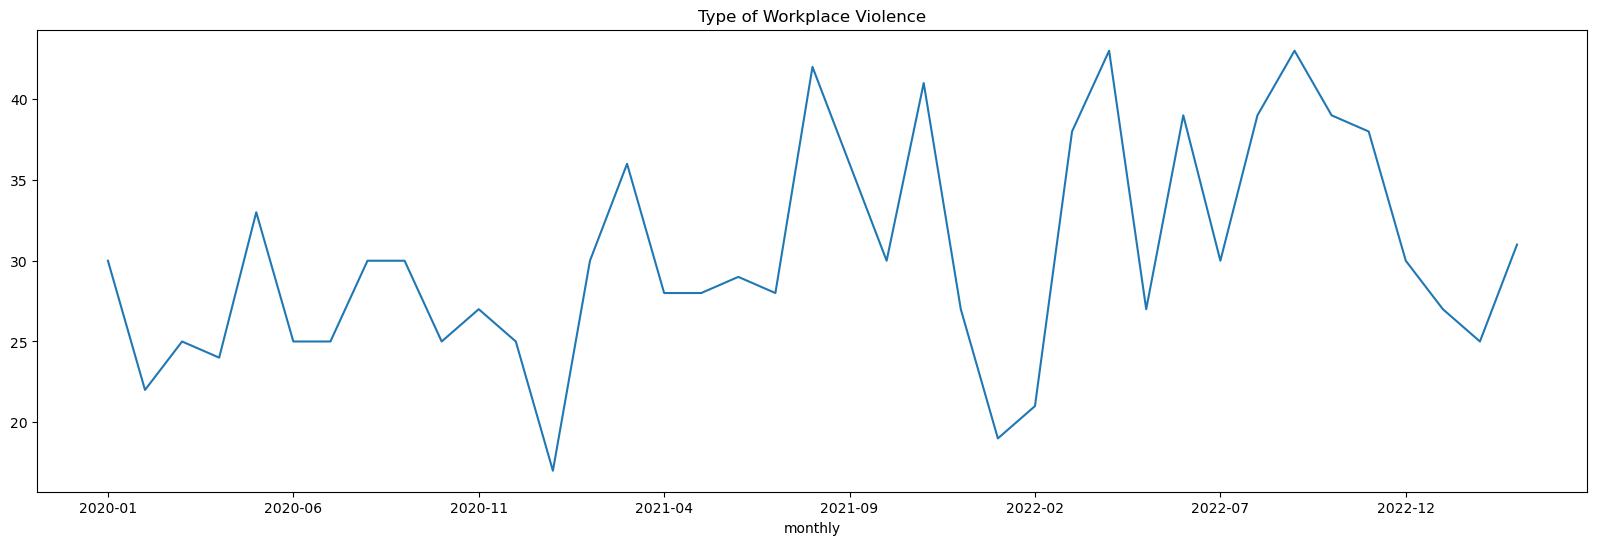

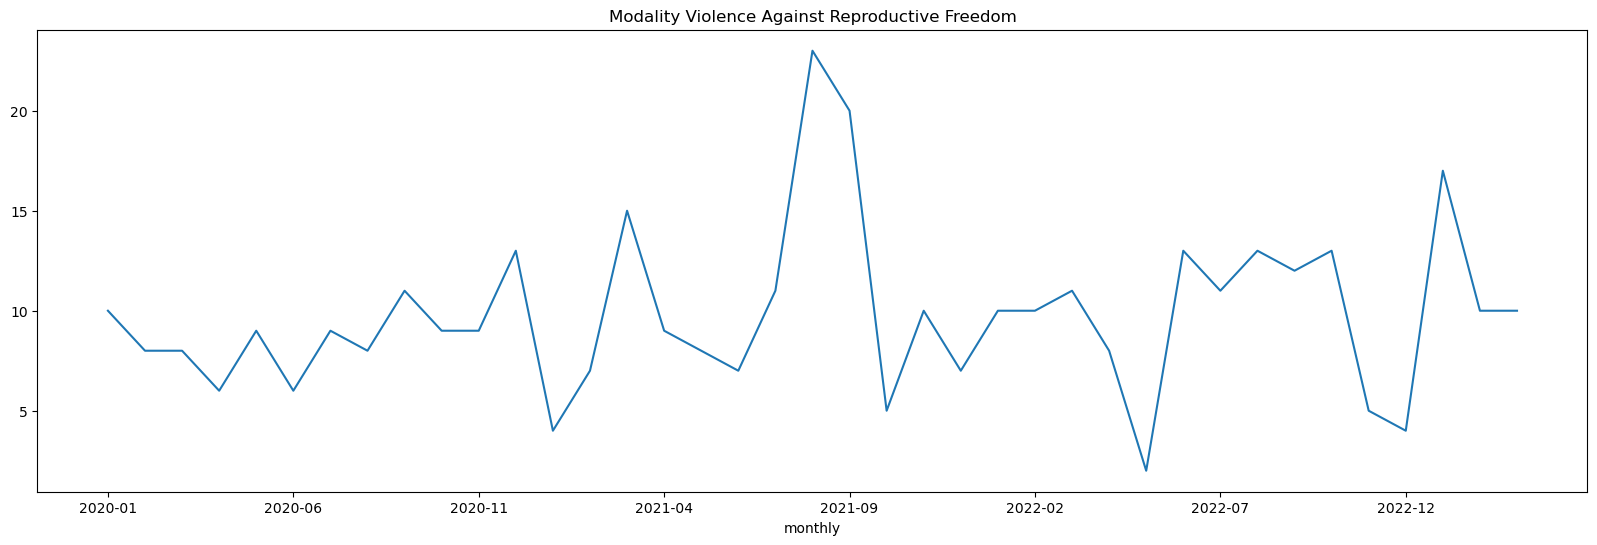

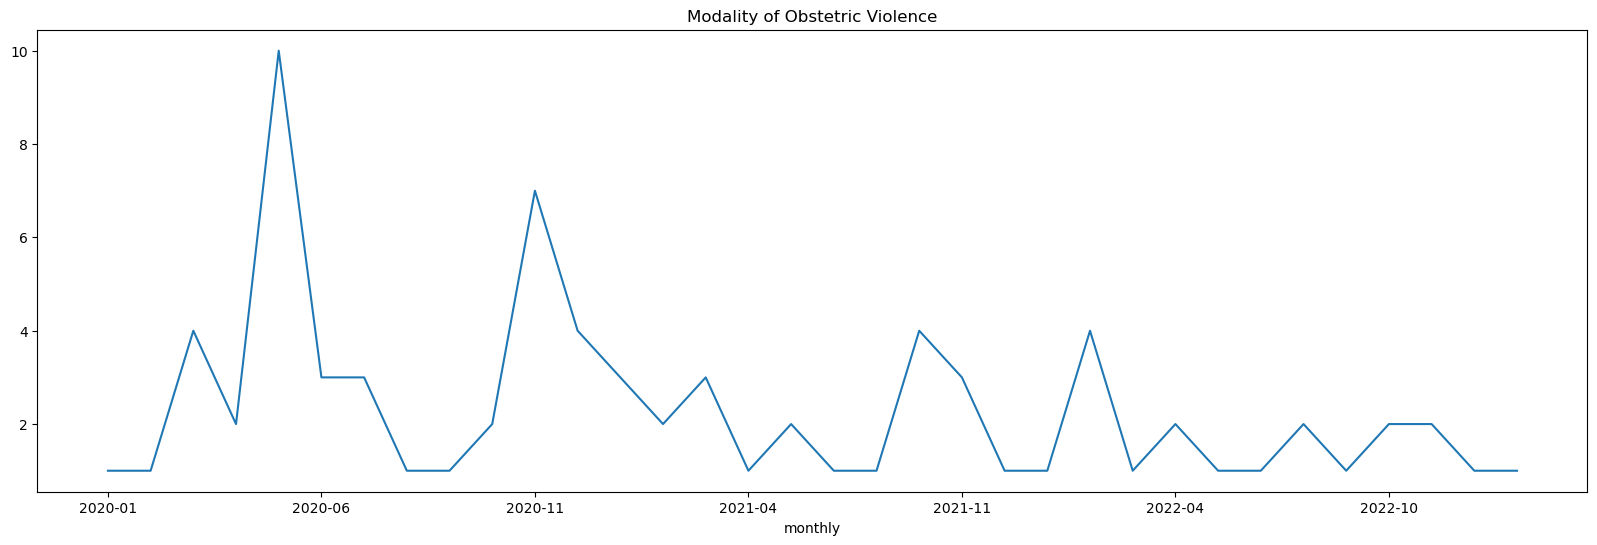

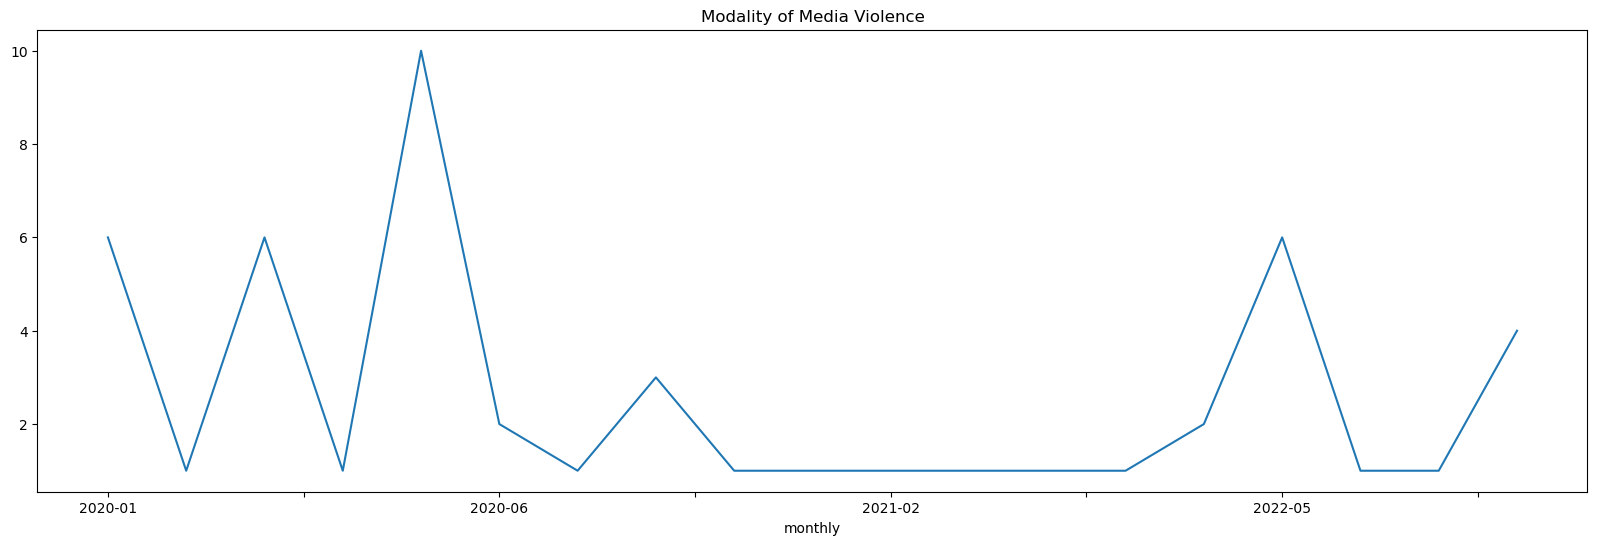

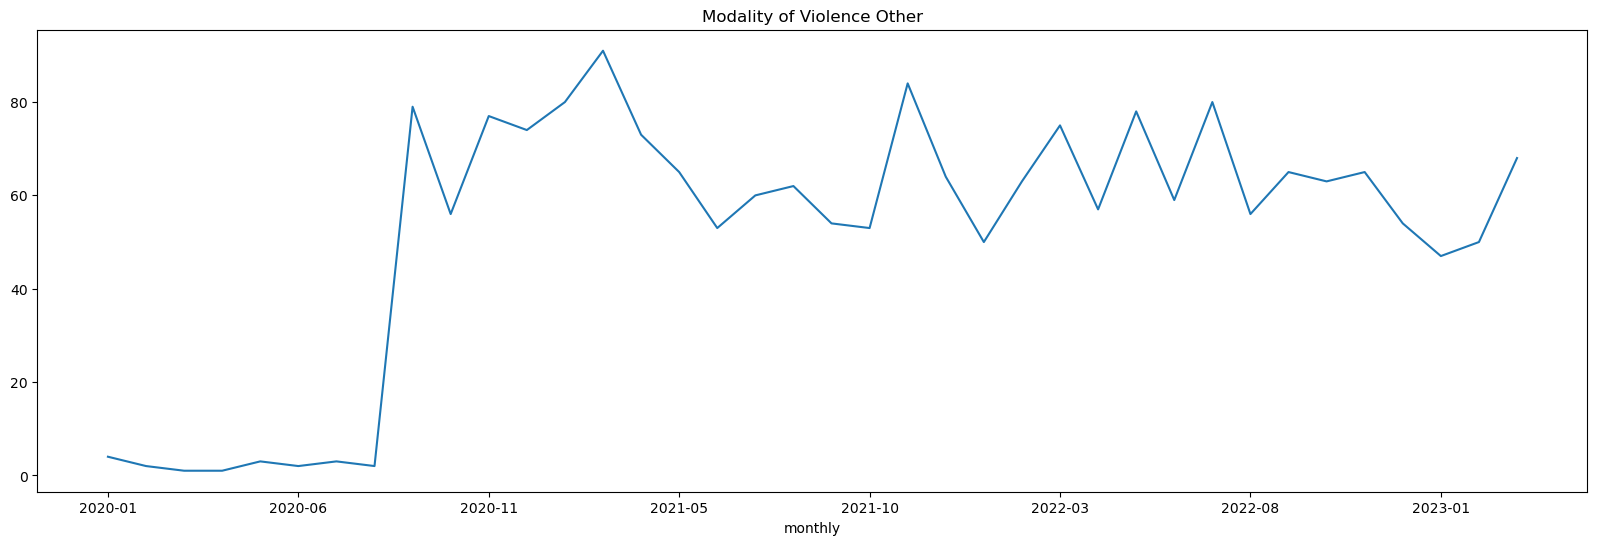

In [162]:

def plot_evolution(_field, _title):
    df = data[data[_field]]
    df = df.groupby('monthly')[_field].size()
    df.plot(kind='line', title=_title, figsize=(20,6))
    plt.show()

for field, title in zip(boolean_fields, boolean_fields_titles):
    plot_evolution(field, title)

# END SCRIPT